In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import RocCurveDisplay

**Importing the dataset**

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


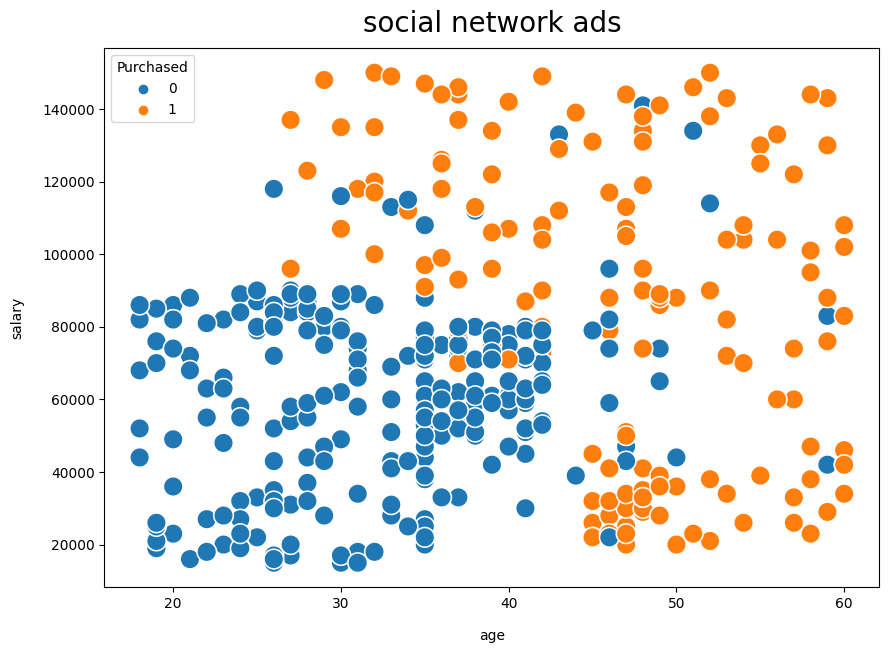

In [6]:

plt.figure(figsize=(10,7))
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=df,s=200)
plt.title("social network ads", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("salary", labelpad=13)
ax = plt.gca()
     

**Splitting the dataset into the Training set and Test set**

In [7]:
del(df['User ID'])
df     

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [8]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [9]:
X=df[['Gender','Age','EstimatedSalary']].values
y=df['Purchased'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25)

**Feature Scaling**

In [10]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

**Fitting SVM to the Training set**

In [12]:
svm_=svm.SVC(kernel='rbf',gamma='scale')
svm_.fit(X_train,y_train)


SVC()

**Predicting the Test set results**

In [13]:
y_pred=svm_.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

**Making the Confusion Matrix**

In [15]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,52,8,60
1,6,34,40
All,58,42,100


**Visualising the Training set results**

In [16]:
training_score=svm_.score(X_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 92.66666666666666


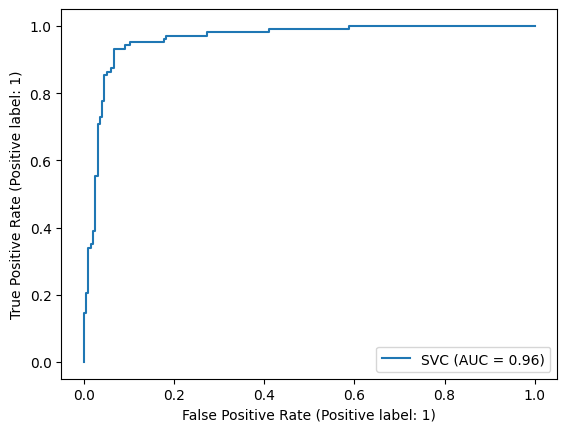

In [18]:
RocCurveDisplay.from_estimator(svm_,X_train,y_train)

**Visualising the Test set results**

In [21]:
test_score=svm_.score(X_test,y_test)*100
print('Test score is:',test_score)

Test score is: 86.0


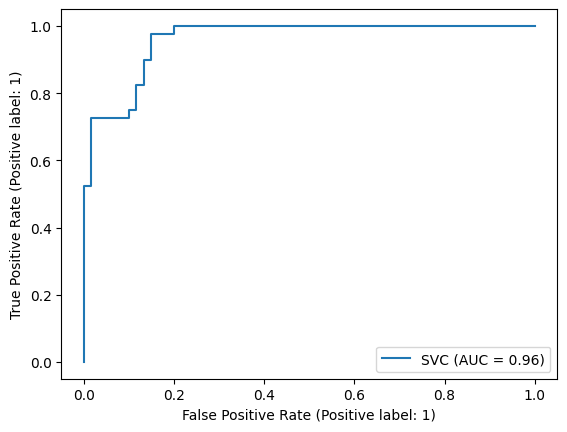

In [22]:
RocCurveDisplay.from_estimator(svm_,X_test,y_test)